<a href="https://colab.research.google.com/github/ayandahuate/Data-Science-Internship/blob/main/EDA_graduates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [21]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

# find file path from directory window on the left pane of this file)
file_path = "/content/drive/MyDrive/Data Science Internship/Athletics cohort 2013-2017/Athletics20132017.xlsx"

# read csv into Pandas data from
df = pd.read_excel(file_path)

# show first 5 rows
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,ID_NUM,GENDER,ETHINCITY_RACE_DESCRIPTION,DOB,MAJOR_MINOR_DESC,DEPARTMENT,CAREER_GPA,COHORT,CANDIDACY_TYPE,DTE_DEGR_CONFERRED,EXIT_REASON,EXIT_DATE,athlete,athleteSport
0,290363,M,"White, Non-Hispanic",1995-05-12,Sports Management,BUS,2.64,FALL 2013 FTFT,F,2017-05-13,G,2017-05-13,N,NaN
1,446698,F,"White, Non-Hispanic",1995-07-17,Biochemistry Major,BIO,3.18,FALL 2013 FTFT,F,2017-05-13,G,2017-05-13,Y,Tennis--Women
2,446761,M,"White, Non-Hispanic",1995-04-15,Education Curriculum Studies,EDU,2.86,FALL 2013 FTFT,F,2017-05-13,G,2017-05-13,N,NaN
3,447029,M,Asian or Pacific Islander,1995-04-23,Undecided,Undecided,2.71,FALL 2013 FTFT,F,NaT,O,2014-05-08,Y,Soccer--Men
4,447033,M,"White, Non-Hispanic",1994-07-22,Biochemistry Major,BIO,3.94,FALL 2013 FTFT,F,2017-05-13,G,2017-05-13,N,NaN


In [22]:
df.columns

Index(['ID_NUM', 'GENDER', 'ETHINCITY_RACE_DESCRIPTION', 'DOB',
       'MAJOR_MINOR_DESC', 'DEPARTMENT', 'CAREER_GPA', 'COHORT',
       'CANDIDACY_TYPE', 'DTE_DEGR_CONFERRED', 'EXIT_REASON', 'EXIT_DATE',
       'athlete', 'athleteSport'],
      dtype='object')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1314 entries, 0 to 1313
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ID_NUM                      1314 non-null   int64         
 1   GENDER                      1314 non-null   object        
 2   ETHINCITY_RACE_DESCRIPTION  1314 non-null   object        
 3   DOB                         1314 non-null   datetime64[ns]
 4   MAJOR_MINOR_DESC            1314 non-null   object        
 5   DEPARTMENT                  1314 non-null   object        
 6   CAREER_GPA                  1314 non-null   float64       
 7   COHORT                      1314 non-null   object        
 8   CANDIDACY_TYPE              1314 non-null   object        
 9   DTE_DEGR_CONFERRED          775 non-null    datetime64[ns]
 10  EXIT_REASON                 1271 non-null   object        
 11  EXIT_DATE                   1271 non-null   datetime64[n

In [24]:
#creating new column 'COHORT_DATE' based on column "COHORT'

#Function to extract the year and semester from COHORT
def extract_cohort_date(cohort):
    parts = cohort.split()
    year = int(parts[1])
    semester = parts[0]

    if semester == 'FALL':
        return pd.to_datetime(f'09/01/{year}')

# Create a new column 'COHORT_DATE' using the function
df['COHORT_DATE'] = df['COHORT'].apply(extract_cohort_date)

# Display the transformed DataFrame
print(df)

       ID_NUM GENDER ETHINCITY_RACE_DESCRIPTION        DOB  \
0      290363      M        White, Non-Hispanic 1995-05-12   
1      446698      F        White, Non-Hispanic 1995-07-17   
2      446761      M        White, Non-Hispanic 1995-04-15   
3      447029      M  Asian or Pacific Islander 1995-04-23   
4      447033      M        White, Non-Hispanic 1994-07-22   
...       ...    ...                        ...        ...   
1309  1715933      F  Black or African American 1996-03-18   
1310  1715945      M  Black or African American 1994-07-04   
1311  1715951      M      Hispanics of any race 1994-06-23   
1312  1715953      F                      White 1996-08-07   
1313  1715958      F  Black or African American 1993-07-17   

                  MAJOR_MINOR_DESC DEPARTMENT  CAREER_GPA              COHORT  \
0                Sports Management        BUS        2.64      FALL 2013 FTFT   
1               Biochemistry Major        BIO        3.18      FALL 2013 FTFT   
2     Educat

In [26]:
# Calculate age based on DOB and creating new colum 'AGE'

#.astype('<m8[Y]') to convert days to integer years
df['AGE'] = (df['COHORT_DATE'] - df['DOB']).astype('<m8[Y]')

# df with new column age
print(df)

       ID_NUM GENDER ETHINCITY_RACE_DESCRIPTION        DOB  \
0      290363      M        White, Non-Hispanic 1995-05-12   
1      446698      F        White, Non-Hispanic 1995-07-17   
2      446761      M        White, Non-Hispanic 1995-04-15   
3      447029      M  Asian or Pacific Islander 1995-04-23   
4      447033      M        White, Non-Hispanic 1994-07-22   
...       ...    ...                        ...        ...   
1309  1715933      F  Black or African American 1996-03-18   
1310  1715945      M  Black or African American 1994-07-04   
1311  1715951      M      Hispanics of any race 1994-06-23   
1312  1715953      F                      White 1996-08-07   
1313  1715958      F  Black or African American 1993-07-17   

                  MAJOR_MINOR_DESC DEPARTMENT  CAREER_GPA              COHORT  \
0                Sports Management        BUS        2.64      FALL 2013 FTFT   
1               Biochemistry Major        BIO        3.18      FALL 2013 FTFT   
2     Educat

In [27]:
#getting counts for each category

# counts for 'GENDER'
gender_counts = df['GENDER'].value_counts()
print("Counts of GENDER:")
print(gender_counts)

# counts for 'ETHNICITY_RACE_DESCRIPTION'
ethnicity_counts = df['ETHINCITY_RACE_DESCRIPTION'].value_counts()
print("\nCounts of ETHNICITY_RACE_DESCRIPTION:")
print(ethnicity_counts)


# counts for ' CANDIDACY_TYPE '

candidacy_counts = df ['CANDIDACY_TYPE'].value_counts()
print("\nCounts of CANDIDACY TYPE:")
print(candidacy_counts)

# counts for 'ETHNICITY_RACE_DESCRIPTION'
ethnicity_counts = df['ETHINCITY_RACE_DESCRIPTION'].value_counts()
print("\nCounts of ETHNICITY_RACE_DESCRIPTION:")
print(ethnicity_counts)


# counts for athletes and non athletes
athlete_counts = df['athlete'].value_counts()
print("\n Counts of athletes and non athletes ")
print(athlete_counts)

# counts for 'athleteSport'
sport_counts = df['athleteSport'].value_counts()
print("\nCounts of Sports:")
print(sport_counts)


# counts for 'DEPARTMENT'
department_counts = df['DEPARTMENT'].value_counts()
print("\nCounts of DEPARTMENT:")
print(department_counts)

# counts for 'AGE'
age_counts = df['AGE'].value_counts()
print("\nCounts of AGE:")
print(age_counts)


#counts for 'COHORT'
cohort_counts = df['COHORT'].value_counts()
print("\nCounts of COHORT:")
print(cohort_counts)

Counts of GENDER:
M    732
F    582
Name: GENDER, dtype: int64

Counts of ETHNICITY_RACE_DESCRIPTION:
White, Non-Hispanic                  711
White                                227
Nonresident Alien                    138
African-American, Non-Hispanic        86
Hispanic                              40
Black or African American             21
American Indian or Alaskan Native     18
Other                                 16
Asian or Pacific Islander             12
Hispanics of any race                 11
Two or more races                      9
Race/Ethnicity Unknown                 7
Race and Ethnicity unknown             7
Unknown                                6
American Indian or Alaska Native       3
Asian                                  2
Name: ETHINCITY_RACE_DESCRIPTION, dtype: int64

Counts of CANDIDACY TYPE:
F    954
T    179
I    127
1     38
Z      9
2      7
Name: CANDIDACY_TYPE, dtype: int64

Counts of ETHNICITY_RACE_DESCRIPTION:
White, Non-Hispanic                  711

In [41]:
#creating new column grouping 'ETHNICITY_RACE_DESCRIPTION'
ethnicity_groups = {
    'White': ['White, Non-Hispanic', 'White'],
    'Nonresident Alien':['Nonresident Alien'],
    'Black or African American':['African-American, Non-Hispanic','Black or African American'],
    'Hispanic':['Hispanic','Hispanics of any race'],
    'American Indian or Alaskan Native':['American Indian or Alaskan Native','American Indian or Alaska Native'],
    'Asian or Pacific Islander':['Asian or Pacific Islander','Asian'],
    'Race/Ethnicity Unknown ':['Race/Ethnicity Unknown','Race and Ethnicity unknown','Unknown','Other','Two or more races']
}

def assign_group(ethnicity):
    for group, ethnicity_in_group in ethnicity_groups.items():
        if ethnicity.lower() in [e.lower() for e in ethnicity_in_group]:
            return group


df['ETHNICITY_RACE_CONCAT'] = df['ETHINCITY_RACE_DESCRIPTION'].apply(assign_group)

# Display the updated DataFrame
print(df)



       ID_NUM GENDER ETHINCITY_RACE_DESCRIPTION        DOB  \
0      290363      M        White, Non-Hispanic 1995-05-12   
1      446698      F        White, Non-Hispanic 1995-07-17   
2      446761      M        White, Non-Hispanic 1995-04-15   
3      447029      M  Asian or Pacific Islander 1995-04-23   
4      447033      M        White, Non-Hispanic 1994-07-22   
...       ...    ...                        ...        ...   
1309  1715933      F  Black or African American 1996-03-18   
1310  1715945      M  Black or African American 1994-07-04   
1311  1715951      M      Hispanics of any race 1994-06-23   
1312  1715953      F                      White 1996-08-07   
1313  1715958      F  Black or African American 1993-07-17   

                  MAJOR_MINOR_DESC DEPARTMENT  CAREER_GPA              COHORT  \
0                Sports Management        BUS        2.64      FALL 2013 FTFT   
1               Biochemistry Major        BIO        3.18      FALL 2013 FTFT   
2     Educat

In [29]:
# counts for 'ETHNICITY_RACE_DESCRIPTION'
ethnicityconc_counts = df['ETHNICITY_RACE_CONCAT'].value_counts()
print("\nCounts of ETHNICITY_RACE_CONCAT:")
print(ethnicityconc_counts)



Counts of ETHNICITY_RACE_CONCAT:
White                                938
Nonresident Alien                    138
Black or African American            107
Hispanic                              51
Race/Ethnicity Unknown                45
American Indian or Alaskan Native     18
Asian or Pacific Islander             14
Name: ETHNICITY_RACE_CONCAT, dtype: int64


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1314 entries, 0 to 1313
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ID_NUM                      1314 non-null   int64         
 1   GENDER                      1314 non-null   object        
 2   ETHINCITY_RACE_DESCRIPTION  1314 non-null   object        
 3   DOB                         1314 non-null   datetime64[ns]
 4   MAJOR_MINOR_DESC            1314 non-null   object        
 5   DEPARTMENT                  1314 non-null   object        
 6   CAREER_GPA                  1314 non-null   float64       
 7   COHORT                      1314 non-null   object        
 8   CANDIDACY_TYPE              1314 non-null   object        
 9   DTE_DEGR_CONFERRED          775 non-null    datetime64[ns]
 10  EXIT_REASON                 1271 non-null   object        
 11  EXIT_DATE                   1271 non-null   datetime64[n

In [45]:
df.describe()

,ID_NUM,CAREER_GPA,AGE
count,1.314000e+03,1314.000000,1314.000000
mean,1.041125e+06,2.916956,18.770167
std,5.924440e+05,0.917314,1.860437
min,2.903630e+05,0.000000,13.000000
25%,4.682375e+05,2.480000,18.000000
50%,4.796040e+05,3.150000,18.000000
75%,1.656001e+06,3.630000,19.000000
max,1.723337e+06,4.000000,51.000000


In [44]:
# Summary of categorical variables  (object = categorical data)
categorical_summary = df.describe(include=['object'])
print(categorical_summary)

       GENDER ETHINCITY_RACE_DESCRIPTION MAJOR_MINOR_DESC DEPARTMENT  \
count    1314                       1314             1314       1314   
unique      2                         16               94         16   
top         M        White, Non-Hispanic        Undecided  Undecided   
freq      732                        711              345        345   

                COHORT CANDIDACY_TYPE EXIT_REASON athlete athleteSport  \
count             1314           1314        1271    1314          699   
unique              10              6           6       2           19   
top     FALL 2013 FTFT              F           G       Y     Football   
freq               259            954         757     699          155   

       ETHNICITY_RACE_CONCAT  
count                   1314  
unique                     7  
top                    White  
freq                     938  


In [32]:
#Summary of  dates
dates_summary = df.describe(include=['datetime'])
print(dates_summary)

                        DOB   DTE_DEGR_CONFERRED            EXIT_DATE  \
count                  1314                  775                 1271   
unique                  988                   26                  109   
top     1997-08-17 00:00:00  2017-05-13 00:00:00  2017-05-13 00:00:00   
freq                      5                  135                  138   
first   1963-03-27 00:00:00  2014-08-31 00:00:00  2013-08-26 00:00:00   
last    2004-05-25 00:00:00  2023-05-13 00:00:00  2023-08-03 00:00:00   

                COHORT_DATE  
count                  1314  
unique                    5  
top     2013-09-01 00:00:00  
freq                    304  
first   2013-09-01 00:00:00  
last    2017-09-01 00:00:00  


<ipython-input-32-2e33b5b6b3b1>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  dates_summary = df.describe(include=['datetime'])
<ipython-input-32-2e33b5b6b3b1>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  dates_summary = df.describe(include=['datetime'])
<ipython-input-32-2e33b5b6b3b1>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  dates_summary = df.describe(include=['datetime']

# **CREATING GRADUATES SUB DATASETS**


In [46]:
# students who graduated from westminster only based on DTE_DEGR_CONFERRED
graduates_df = df[df['DTE_DEGR_CONFERRED'].notna()]

graduates_df.head()
print(graduates_df)

       ID_NUM GENDER ETHINCITY_RACE_DESCRIPTION        DOB  \
0      290363      M        White, Non-Hispanic 1995-05-12   
1      446698      F        White, Non-Hispanic 1995-07-17   
2      446761      M        White, Non-Hispanic 1995-04-15   
4      447033      M        White, Non-Hispanic 1994-07-22   
7      449361      F        White, Non-Hispanic 1995-07-20   
...       ...    ...                        ...        ...   
1307  1715897      M                      White 1997-12-04   
1308  1715929      M          Two or more races 1997-01-19   
1309  1715933      F  Black or African American 1996-03-18   
1312  1715953      F                      White 1996-08-07   
1313  1715958      F  Black or African American 1993-07-17   

                   MAJOR_MINOR_DESC DEPARTMENT  CAREER_GPA  \
0                 Sports Management        BUS        2.64   
1                Biochemistry Major        BIO        3.18   
2      Education Curriculum Studies        EDU        2.86   
4      

<Axes: >

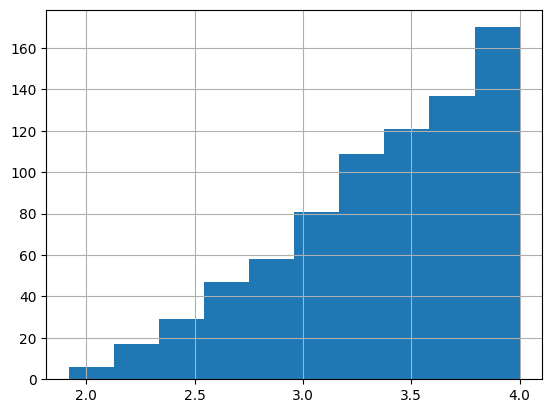

In [47]:
graduates_df.CAREER_GPA.hist()

<Axes: >

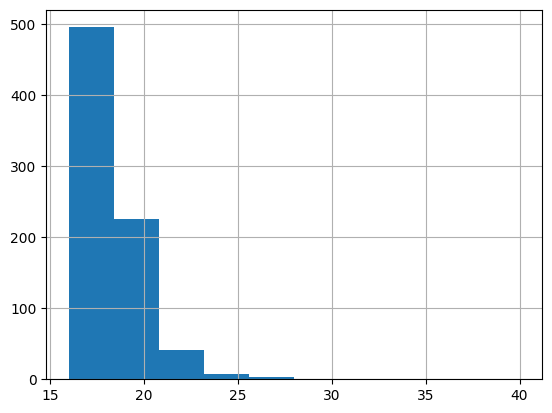

In [48]:
graduates_df.AGE.hist()

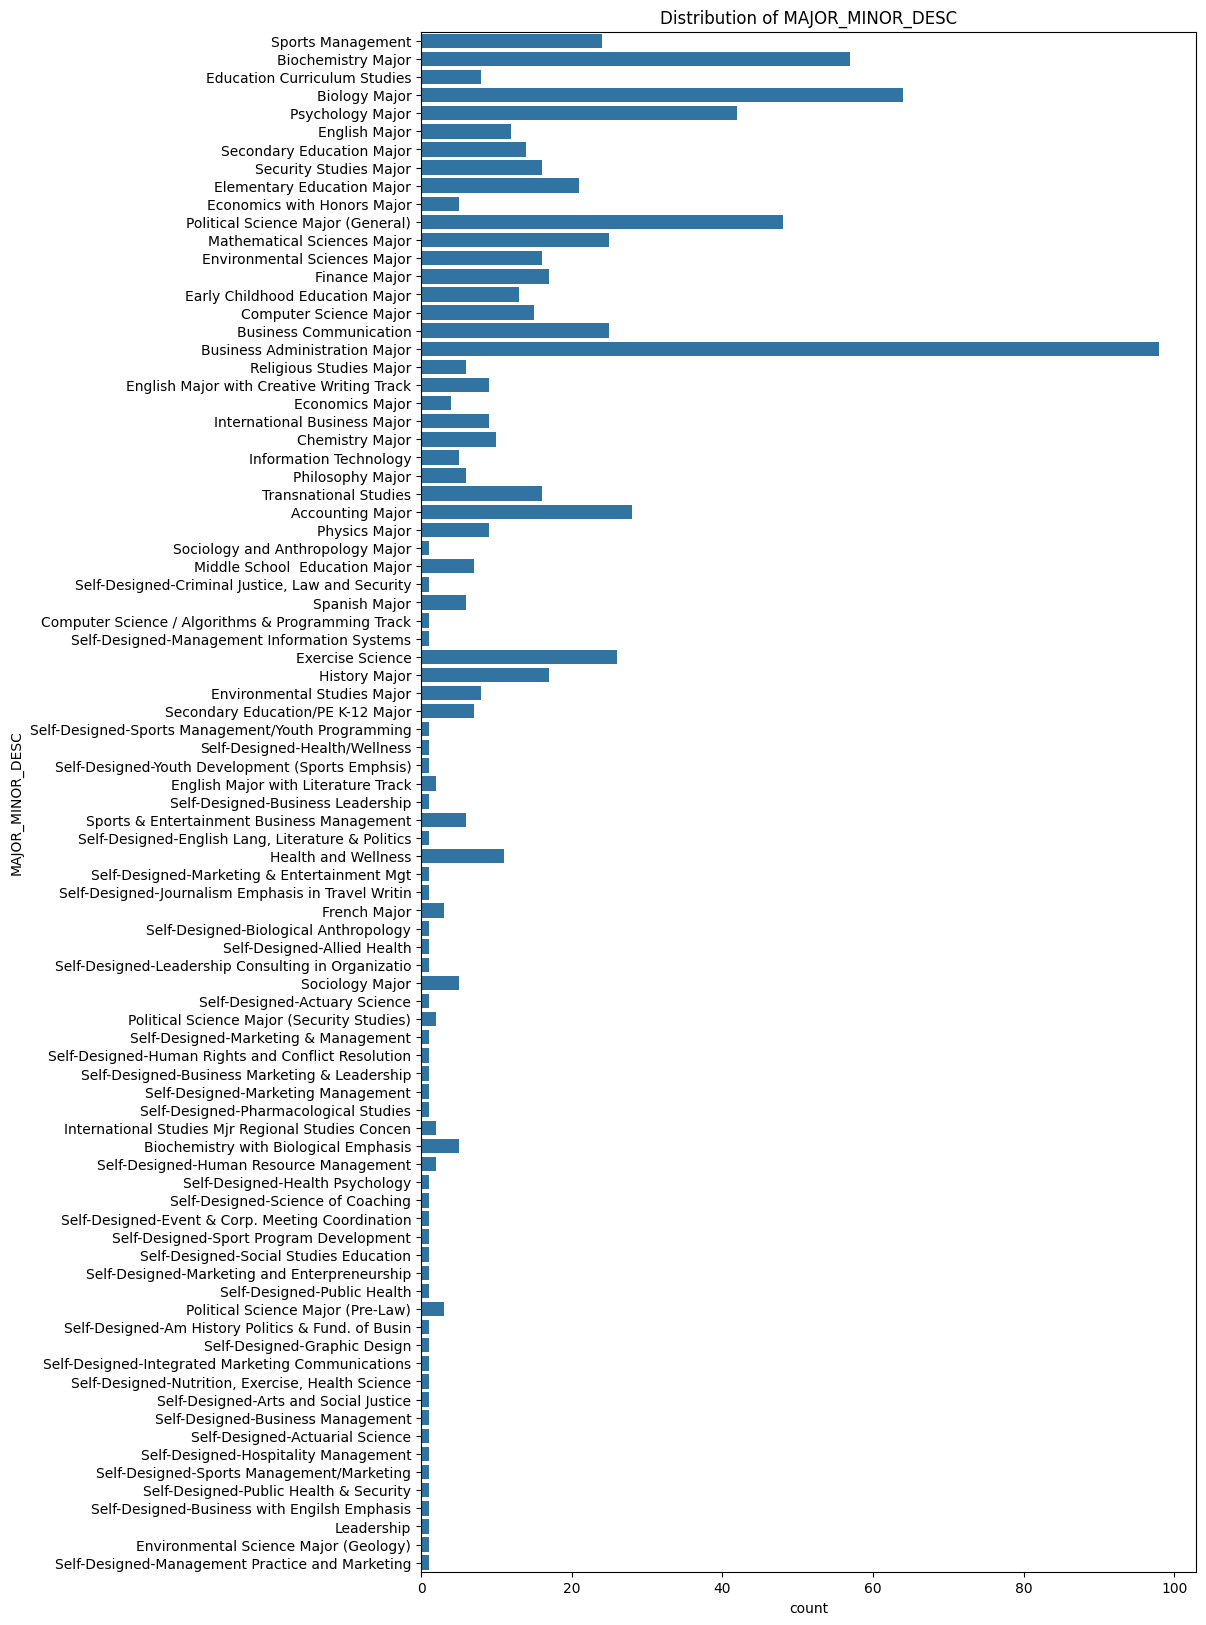

In [52]:
# Plot distribution of 'MAJOR_MINOR_DESC'
plt.figure(figsize=(10, 20))
sns.countplot(y='MAJOR_MINOR_DESC', data=graduates_df)
plt.title('Distribution of MAJOR_MINOR_DESC')
#plt.xticks(rotation=90, ha='right')
plt.show()

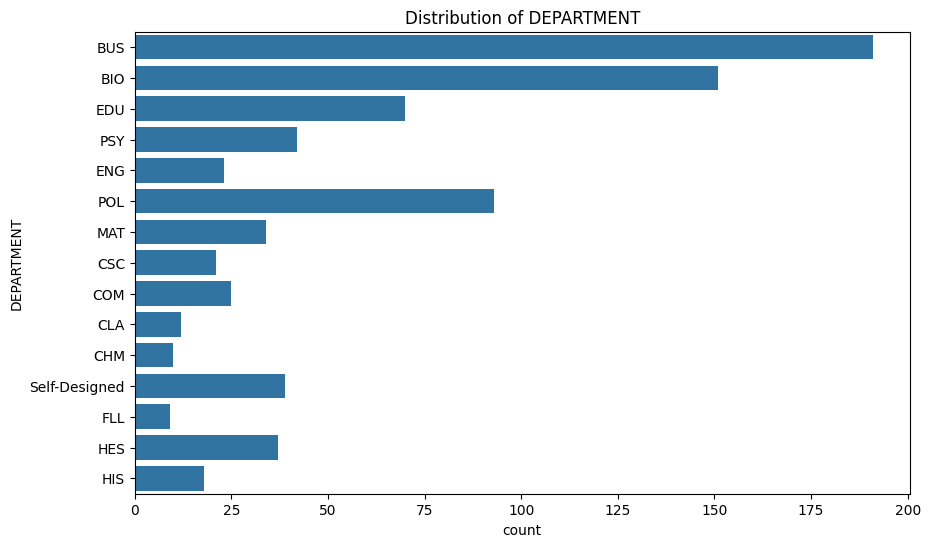

In [53]:
# Plot distribution of 'DEPARTMENT'
plt.figure(figsize=(10, 6))
sns.countplot(y='DEPARTMENT', data=graduates_df)
plt.title('Distribution of DEPARTMENT')
plt.show()

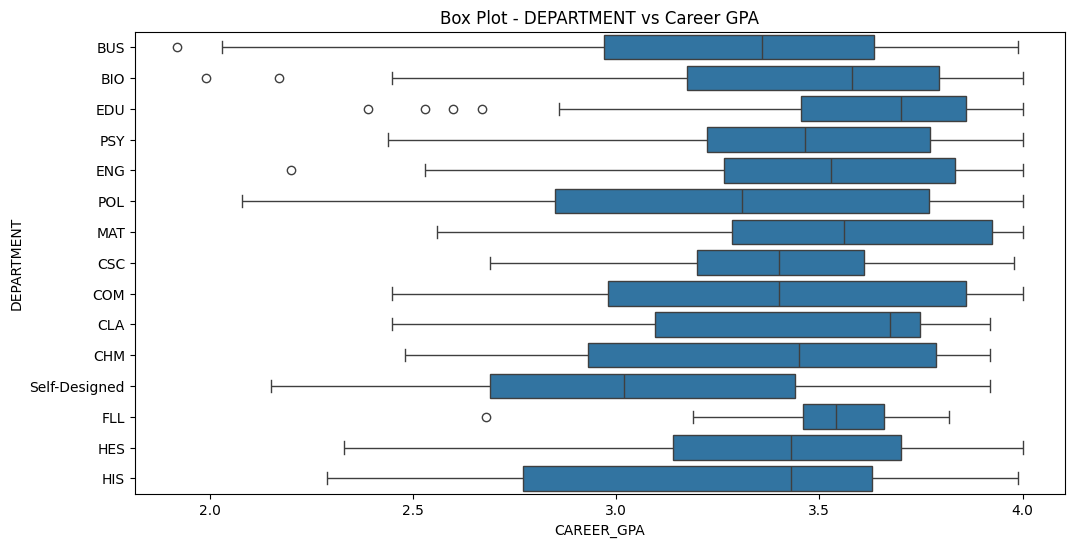

In [54]:
plt.figure(figsize=(12, 6))
sns.boxplot(y='DEPARTMENT', x='CAREER_GPA', data=graduates_df)
plt.title('Box Plot - DEPARTMENT vs Career GPA')
plt.show()

In [55]:
#One way Anova testing : used to compare the mean GPA of different departments

from scipy.stats import f_oneway
#  groups based on 'department'
departments = graduates_df['DEPARTMENT'].unique()
department_groups = [graduates_df['CAREER_GPA'][graduates_df['DEPARTMENT'] == DEPARTMENT] for DEPARTMENT in departments]

# Perform one-way ANOVA
f_statistic, p_value = f_oneway(*department_groups)

# Print the results
print(f'F-statistic: {f_statistic}')
print(f'P-value: {p_value}')

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print('Reject the null hypothesis. There is a significant difference in average grades among departments.')
else:
    print('Fail to reject the null hypothesis. There is no significant difference in average grades among departments.')

F-statistic: 5.013750534880088
P-value: 5.098628638810923e-09
Reject the null hypothesis. There is a significant difference in average grades among departments.


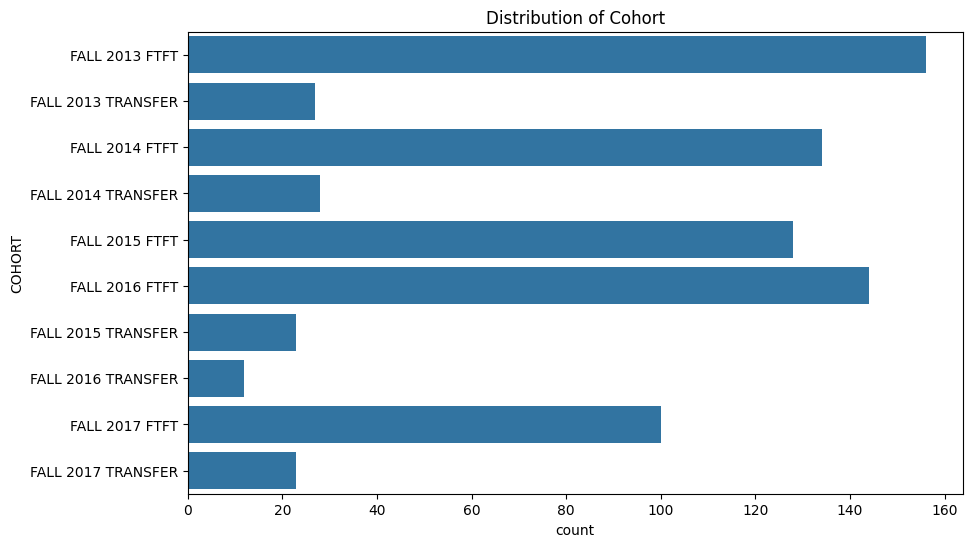

In [56]:
# Plot distribution of 'COHORT'
plt.figure(figsize=(10, 6))
sns.countplot(y='COHORT', data=graduates_df)
plt.title('Distribution of Cohort')
plt.show()

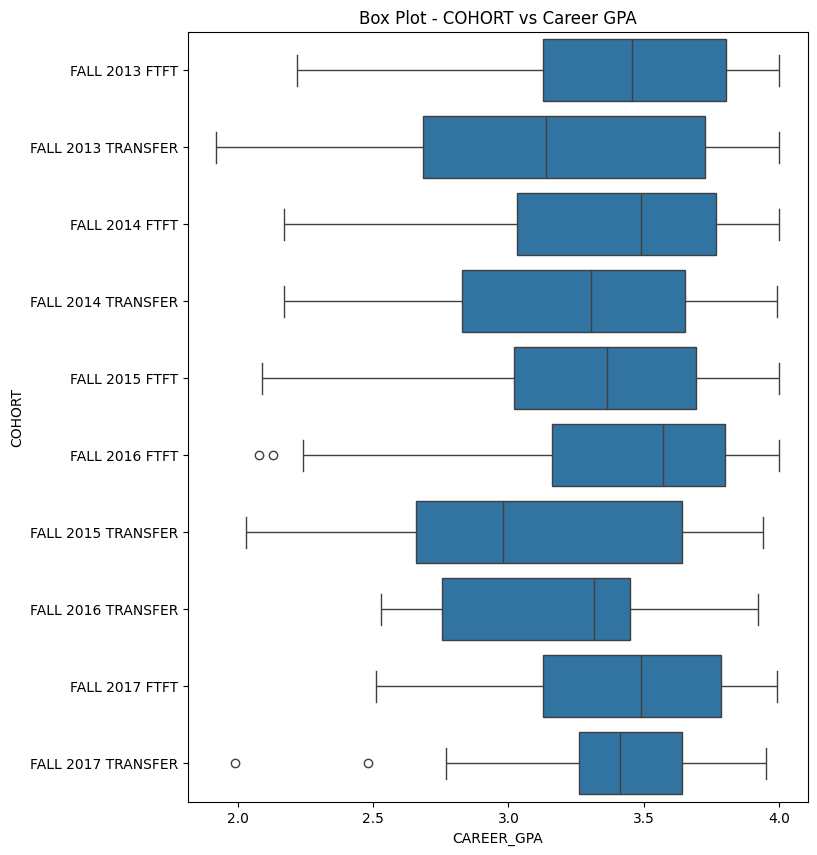

In [57]:
plt.figure(figsize=(8, 10))
sns.boxplot(y='COHORT', x='CAREER_GPA', data=graduates_df)
plt.title('Box Plot - COHORT vs Career GPA')
plt.show()

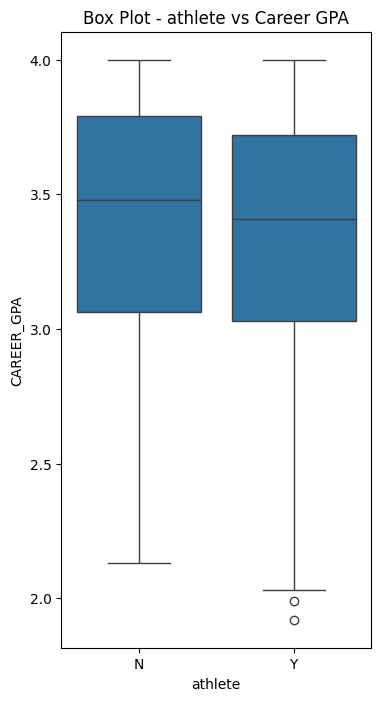

In [58]:
plt.figure(figsize=(4, 8))
sns.boxplot(x='athlete', y='CAREER_GPA', data=graduates_df)
plt.title('Box Plot - athlete vs Career GPA')
plt.show()

In [ ]:
#next step: do 2 sample t test to see if means significantly different

In [60]:
from scipy.stats import ttest_ind

#athletes / non athletes subgroups

athlete_grad = graduates_df['CAREER_GPA'][graduates_df['athlete']== 'Y']
nonathlete_grad = graduates_df['CAREER_GPA'][graduates_df['athlete']== 'N']

#two sample t test
t_statistic, p_value = ttest_ind(athlete_grad, nonathlete_grad)

#results

print(f'T-statistics: {t_statistic}')
print(f'P-value:{p_value}')

# result interpretation
alpha = 0.05
if p_value < alpha:
    print('Reject the null hypothesis. There is a significant difference in average grades between athlete and non athlete students.')
else:
    print('Fail to reject the null hypothesis. There is no significant difference in average grades between athlete and non athlete students.')


T-statistics: -0.9466127570655798
P-value:0.34413195111109385
Fail to reject the null hypothesis. There is no significant difference in average grades between athlete and non athlete students.


# **SUBDATASET: GRADUATE ATHLETES**

In [63]:
#grad athletes data only
# filtering athletes row
grad_athletes_df = graduates_df[graduates_df['athlete'] == 'Y']

print(grad_athletes_df)

       ID_NUM GENDER ETHINCITY_RACE_DESCRIPTION        DOB  \
1      446698      F        White, Non-Hispanic 1995-07-17   
7      449361      F        White, Non-Hispanic 1995-07-20   
11     453228      F        White, Non-Hispanic 1995-06-20   
12     454013      M        White, Non-Hispanic 1994-10-13   
14     454237      F        White, Non-Hispanic 1995-07-28   
...       ...    ...                        ...        ...   
1301  1715826      M                      White 1998-01-07   
1303  1715833      M                      White 1998-03-31   
1307  1715897      M                      White 1997-12-04   
1309  1715933      F  Black or African American 1996-03-18   
1312  1715953      F                      White 1996-08-07   

                   MAJOR_MINOR_DESC DEPARTMENT  CAREER_GPA  \
1                Biochemistry Major        BIO        3.18   
7                     Biology Major        BIO        3.23   
11                    English Major        ENG        3.90   
12     

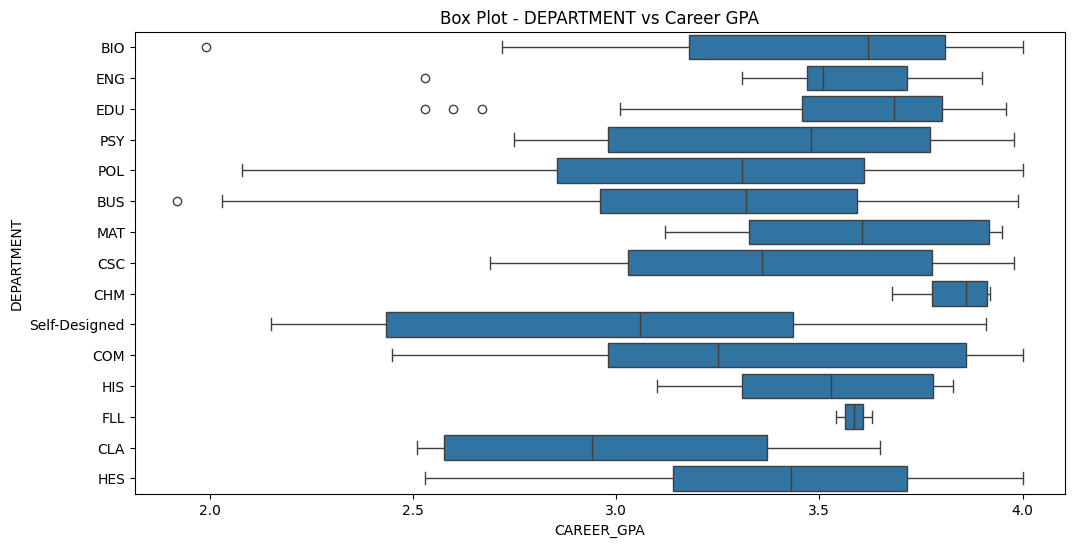

In [64]:
plt.figure(figsize=(12, 6))
sns.boxplot(y='DEPARTMENT', x='CAREER_GPA', data=grad_athletes_df)
plt.title('Box Plot - DEPARTMENT vs Career GPA')
plt.show()

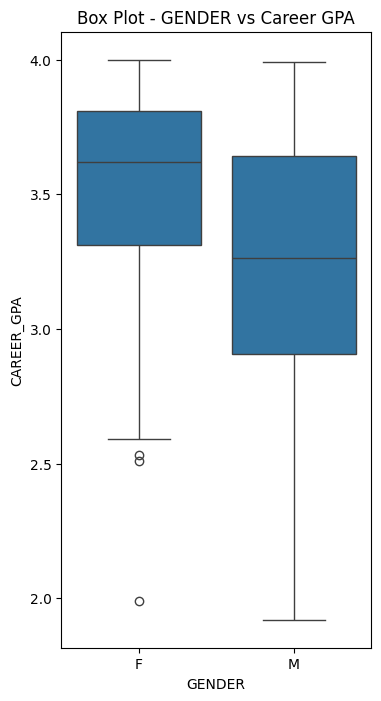

In [67]:
plt.figure(figsize=(4, 8))
sns.boxplot(x='GENDER', y='CAREER_GPA', data=grad_athletes_df)
plt.title('Box Plot - GENDER vs Career GPA')
plt.show()

In [ ]:
#next step: do 2 sample t test to see if means significantly different

In [68]:
from scipy.stats import ttest_ind
#MF subgroups
male_grad_grades = grad_athletes_df['CAREER_GPA'][grad_athletes_df['GENDER'] == 'M']
female_grad_grades = grad_athletes_df['CAREER_GPA'][grad_athletes_df['GENDER'] == 'F']

# Perform a two-sample t-test
t_statistic, p_value = ttest_ind(male_grad_grades, female_grad_grades)

# Print the results
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print('Reject the null hypothesis. There is a significant difference in average grades between male and female athletes.')
else:
    print('Fail to reject the null hypothesis. There is no significant difference in average grades between male and female athletes.')

T-statistic: -6.819919772507076
P-value: 3.267772278672335e-11
Reject the null hypothesis. There is a significant difference in average grades between male and female athletes.


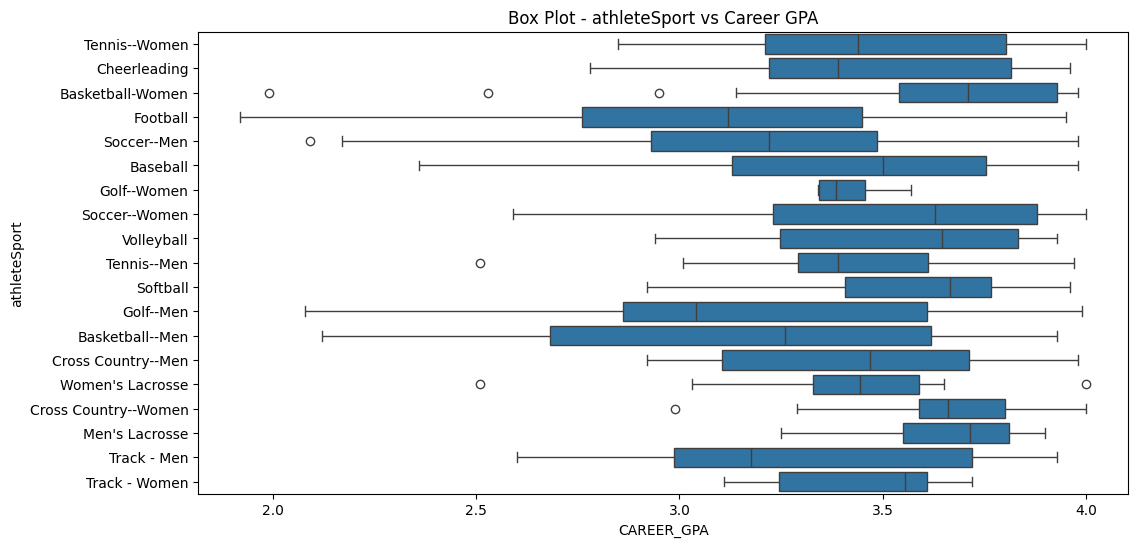

In [69]:
plt.figure(figsize=(12, 6))
sns.boxplot(y='athleteSport', x='CAREER_GPA', data=grad_athletes_df)
plt.title('Box Plot - athleteSport vs Career GPA')
plt.show()

In [70]:
#One way Anova testing : used to compare the mean GPA of different sports

from scipy.stats import f_oneway
#  groups based on 'department'
sports = grad_athletes_df['athleteSport'].unique()
sports_groups = [grad_athletes_df['CAREER_GPA'][grad_athletes_df['athleteSport'] == athleteSport] for athleteSport in sports]

# Perform one-way ANOVA
f_statistic, p_value = f_oneway(*sports_groups)

# Print the results
print(f'F-statistic: {f_statistic}')
print(f'P-value: {p_value}')

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print('Reject the null hypothesis. There is a significant difference in average grades among sports.')
else:
    print('Fail to reject the null hypothesis. There is no significant difference in average grades among sports.')

F-statistic: 4.273014309844592
P-value: 2.3625440008209886e-08
Reject the null hypothesis. There is a significant difference in average grades among sports.


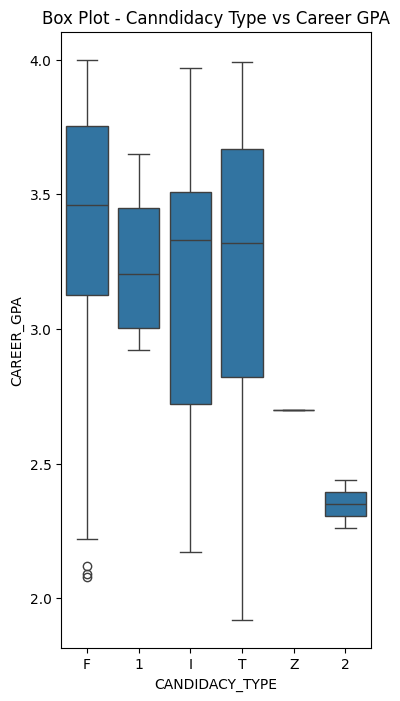

In [71]:
plt.figure(figsize=(4, 8))
sns.boxplot(x='CANDIDACY_TYPE', y='CAREER_GPA', data=grad_athletes_df)
plt.title('Box Plot - Canndidacy Type vs Career GPA')
plt.show()